<a href="https://colab.research.google.com/github/anastasiia-vsk/ML_course/blob/main/%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B8%D1%85_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [ ]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

print("Inputs Tensor:")
print(inputs_tensor)

print("\nTargets Tensor:")
print(targets_tensor)

Inputs Tensor:
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Targets Tensor:
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [ ]:
torch.random.manual_seed(1)

In [ ]:
w = torch.randn(1, 3, dtype=torch.float32)
b = torch.randn(1, dtype=torch.float32)

print("w =", w)
print("b =", b)

w = tensor([[0.6614, 0.2669, 0.0617]])
b = tensor([0.6213])


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [ ]:
# def model(x):
#     return 1 / (1 + torch.exp(-(x @ w + b)))

In [ ]:
def model(x, w, b):
    return 1/(1 + torch.exp(-(x @ w.t() + b)))

In [ ]:
preds = model(inputs_tensor, w,b)

print(preds)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


*Так, передбачення трохи підозрілі — всі значення рівні 1.0, тобто модель "впевнена", що у всіх випадках буде позитивний результат (яблук більше 80). Це виглядає неприродно, бо в реальних даних навряд чи всі приклади мають однакову відповідь.*

*Швидше за все, це пов’язано з тим, що значення x @ w + b виходять дуже великими, і сигмоїда перетворює їх у значення, близькі до 1. Імовірна причина — ваги w і b мають завеликі значення після ініціалізації. Можна спробувати змінити масштаб випадкових ваг (зробити їх меншими, аналогічно до того, як робили це в лекції)*

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [ ]:
def binary_cross_entropy(predicted_probs, true_labels):
    epsilon = 1e-5
    predicted_probs = torch.clamp(predicted_probs, epsilon, 1 - epsilon)

    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

    return loss.mean()

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [ ]:
w.requires_grad_()
b.requires_grad_()

tensor([0.6213], requires_grad=True)

In [ ]:
preds = model(inputs_tensor, w, b)

In [ ]:
loss = binary_cross_entropy(preds, targets_tensor)

In [ ]:
loss.backward()

In [ ]:
print("Градієнти w:")
print(w.grad)

print("\nГрадієнт b:")
print(b.grad)

Градієнти w:
tensor([[0., 0., 0.]])

Градієнт b:
tensor([0.])


**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [ ]:
# w.requires_grad_()
# b.requires_grad_()

In [ ]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [ ]:
preds = model(inputs_tensor, w, b)

loss = binary_cross_entropy(preds, targets_tensor)

loss.backward()

In [ ]:
print("Передбачення:")
print(preds)

print("\nВтрати:")
print(loss.item())

print("\nГрадієнти w:")
print(w.grad)

print("\nГрадієнт b:")
print(b.grad)

Передбачення:
tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)

Втрати:
0.6829456686973572

Градієнти w:
tensor([[ -5.4417, -18.9853, -10.0682]])

Градієнт b:
tensor([-0.0794])


*Тепер усе виглядає адекватно. Передбачення близькі до 0.5, бо модель ще не "впевнена", втрати — високі, бо вона ще не навчилась добре передбачати, а градієнти нормальні, тобто модель готова оновлювати ваги. Все це — добрий старт для навчання!*

6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [ ]:
learning_rate = 1e-5
epochs = 1000

for epoch in range(epochs):
    preds = model(inputs_tensor, w, b)

    loss = binary_cross_entropy(preds, targets_tensor)

    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        w.grad.zero_()
        b.grad.zero_()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item():.4f}")

Epoch 100: Loss = 0.5626
Epoch 200: Loss = 0.5071
Epoch 300: Loss = 0.4650
Epoch 400: Loss = 0.4327
Epoch 500: Loss = 0.4073
Epoch 600: Loss = 0.3871
Epoch 700: Loss = 0.3706
Epoch 800: Loss = 0.3570
Epoch 900: Loss = 0.3455
Epoch 1000: Loss = 0.3358


In [ ]:
with torch.no_grad():
    final_preds = model(inputs_tensor, w, b)
    predicted_classes = final_preds.round().int()
    true_classes = targets_tensor.int()

    correct = (predicted_classes == true_classes).sum().item()
    accuracy = correct / targets_tensor.size(0)

    print("\nФінальні передбачення:")
    print(final_preds)

    print(f"\nТочність: {accuracy * 100:.2f}%")


Фінальні передбачення:
tensor([[0.5777],
        [0.6685],
        [0.9113],
        [0.1616],
        [0.8653]])

Точність: 80.00%


**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [ ]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [ ]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

In [ ]:
train_ds = TensorDataset(inputs_tensor, targets_tensor)

In [ ]:
for i in range(3):
    print(f"Елемент {i}: Вхідні дані = {train_ds[i][0]}, Мітка = {train_ds[i][1]}")

Елемент 0: Вхідні дані = tensor([73., 67., 43.]), Мітка = tensor([0.])
Елемент 1: Вхідні дані = tensor([91., 88., 64.]), Мітка = tensor([1.])
Елемент 2: Вхідні дані = tensor([ 87., 134.,  58.]), Мітка = tensor([1.])


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [ ]:
train_dl = DataLoader(train_ds, batch_size=5, shuffle=True)

In [ ]:
first_batch = next(iter(train_dl))

In [ ]:
inputs_batch, targets_batch = first_batch
print("Вхідні дані батчу:\n", inputs_batch)
print("Мітки батчу:\n", targets_batch)

Вхідні дані батчу:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
Мітки батчу:
 tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [ ]:
class LogReg(nn.Module):
    def __init__(self):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(3, 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.act(x)
        return x

In [ ]:
model = LogReg()

print(model)

LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (act): Sigmoid()
)


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [ ]:
opt = optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
loss_fn = F.binary_cross_entropy

In [ ]:
preds = model(inputs_tensor)
loss = loss_fn(preds, targets_tensor)

print("Втрати (loss):", loss.item())

Втрати (loss): 7.631152629852295


*Модель ще не навчилась — це видно з того, що значення втрат (loss) становить 7.63, що є надто високим для задачі бінарної класифікації. Це означає, що передбачення моделі поки що дуже далекі від правильних міток. Ймовірно, потрібно або збільшити learning rate, або провести кілька епох навчання, щоб модель почала краще пристосовуватись до даних.*

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [ ]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0

        for xb, yb in train_dl:
            pred = model(xb)

            loss = loss_fn(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        if (epoch + 1) % 100 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [ ]:
loss = fit_return_loss(1000, model, loss_fn, opt, train_dl)

Epoch [100/1000], Loss: 4.5353
Epoch [200/1000], Loss: 3.6974
Epoch [300/1000], Loss: 2.8748
Epoch [400/1000], Loss: 2.0854
Epoch [500/1000], Loss: 1.3831
Epoch [600/1000], Loss: 0.8436
Epoch [700/1000], Loss: 0.5492
Epoch [800/1000], Loss: 0.4263
Epoch [900/1000], Loss: 0.3627
Epoch [1000/1000], Loss: 0.3297


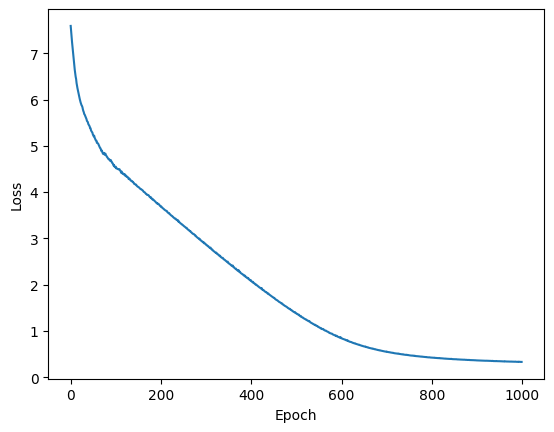

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
preds = model(inputs_tensor)
preds

tensor([[0.5729],
        [0.6791],
        [0.9026],
        [0.1569],
        [0.8761],
        [0.5729],
        [0.6791],
        [0.9026],
        [0.1569],
        [0.8761],
        [0.5729],
        [0.6791],
        [0.9026],
        [0.1569],
        [0.8761]], grad_fn=<SigmoidBackward0>)

In [ ]:
preds_int = (preds >= 0.5).int()
print(preds_int)

tensor([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=torch.int32)


In [ ]:
targets

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

- Маємо 12 правильних із 15

In [ ]:
targets_tensor_int = torch.tensor(targets).squeeze().int()

# Обчислення точності
accuracy = (preds_int.squeeze() == targets_tensor_int).sum().item() / len(targets_tensor_int)
print(f"Точність моделі: {accuracy:.1%}")

Точність моделі: 80.0%


Після 1000 епох навчання модель логістичної регресії показала стабільне зменшення втрат — з початкових 7.63 до 0.33. Це свідчить про те, що модель поступово навчилась знаходити закономірності у вхідних даних. Графік також підтверджує хорошу динаміку навчання.

У результаті передбачення стали досить точними — 80% правильних відповідей (12 з 15).